In [1]:
using PyPlot
using Interact

In [2]:
function runge2(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+2dt*k1/3, t+2*dt/3)
    (k1/4+3k2/4)
end

function runge4(f,x,t,dt)
    k1 = f(x,t)
    k2 = f(x+dt*k1/2, t+dt/2)
    k3 = f(x+dt*k2/2,t+dt/2)
    k4 = f(x+dt*k3,t + dt)
    (k1+2k2+2k3+k4)/6
end

function superrunge(f,x,t,dt)
    x1x,u1x,x1y,u1y,x2x,u2x,x2y,u2y = x
    normi = ((x1x-x2x)^2+(x1y-x2y)^2)^(-3/2)
    if normi < 1e-3
        return "fin"
    else
        k1 = f(x,t)
        k2 = f(x+dt*k1/2, t+dt/2)
        k3 = f(x+dt*k2/2,t+dt/2)
        k4 = f(x+dt*k3,t + dt)
        (k1+2k2+2k3+k4)/6
    end
end

function integrar(f, x0, t0, t_final, dt, metodo = 4)
    # necesito una function f(x,t)
    # que come un vector x, el tiempo t
    # y regresa un vector (el campo vectorial evaluado en x,t)
    
    tiempos = [t0]
    xs = typeof(x0)[x0]

    #x = copy(x0)  # ver pythontutor.com
    
    x = x0
    
    for t in t0:dt:t_final
        if metodo == 1
            k = f(x,t)
        elseif metodo == 2
            k = runge2(f,x,t,dt)
        elseif metodo == 4
            k = runge4(f,x,t,dt)
        elseif metodo == 20
            k = superrunge(f,x,t,dt)
            if k == "fin"
                return xs, tiempos
            end
        else
            error("Los únicos métodos son 1 2 ó 4")
        end
        x_nueva = x + dt*k
        
        push!(xs, x)
        push!(tiempos, t)
        
        x = x_nueva
        
    end
    
    xs, tiempos
end

integrar (generic function with 2 methods)

Interact.Slider{Float64}(Signal{Float64}(25.0, nactions=0),"σ",25.0,0.0:0.1:50.0,true)

Interact.Slider{Float64}(Signal{Float64}(25.0, nactions=0),"β",25.0,0.0:0.1:50.0,true)

Interact.Slider{Float64}(Signal{Float64}(25.0, nactions=0),"ρ",25.0,0.0:0.1:50.0,true)

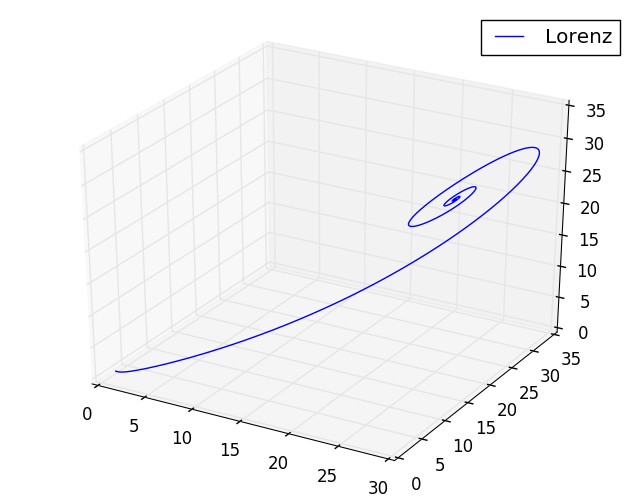

In [3]:
fig = figure()

@manipulate for σ in 0:.1:50, β in 0:.1:50, ρ in 0:.1:50
    withfig(fig) do
        function lorentz(xx,t)
            x,y,z = xx
            [σ*(y-x), x*(ρ-z)-y, x*y-β*z]
        end
        xs, ts = integrar(lorentz,[1., 1., 1.],0. ,20.1 ,1e-3,4)
        plot3D([x[1] for x in xs],[x[2] for x in xs],[x[3] for x in xs],label="Lorenz")
        legend()
    end
end